# NODEMCU

Es una plataforma de IOT(internet of things, Internet de las cosas) basada en el chip ESP8266.

ESP8266 es un SOC (system on chip) que tiene integrado un microprocesador, capacidad WIFI y puertos de entrada salida, como asi tambien distintas interfases de redes.

## Características del NODEMCU

   - Código abierto
   - Interactivo
   - Programable
   - Bajo coste
   - Sencillo
   - Inteligente
   - Habilitado para WI-FI
   - USB-TTL incluido
   - Plug & Play



## Especificaciones del ESP8266


   - Voltaje : 3.0 ~ 3.6V
   - Corriente: 80mA
   - CPU Tensilica Xtensa LX106 de 32 bits RISC que funciona a 80 MHz
   - 16 Pines GPIO
   - SPI
   - I2C
   - I2S
   - UART – 2x TX y 1x RX
   - A0 10bit ADC
   - Temperatura de funcionamiento : -40°C ~ 125°C
   - Rango de frecuencia: 2400 ~ 2483.5MHz


## NODEMCU esquema

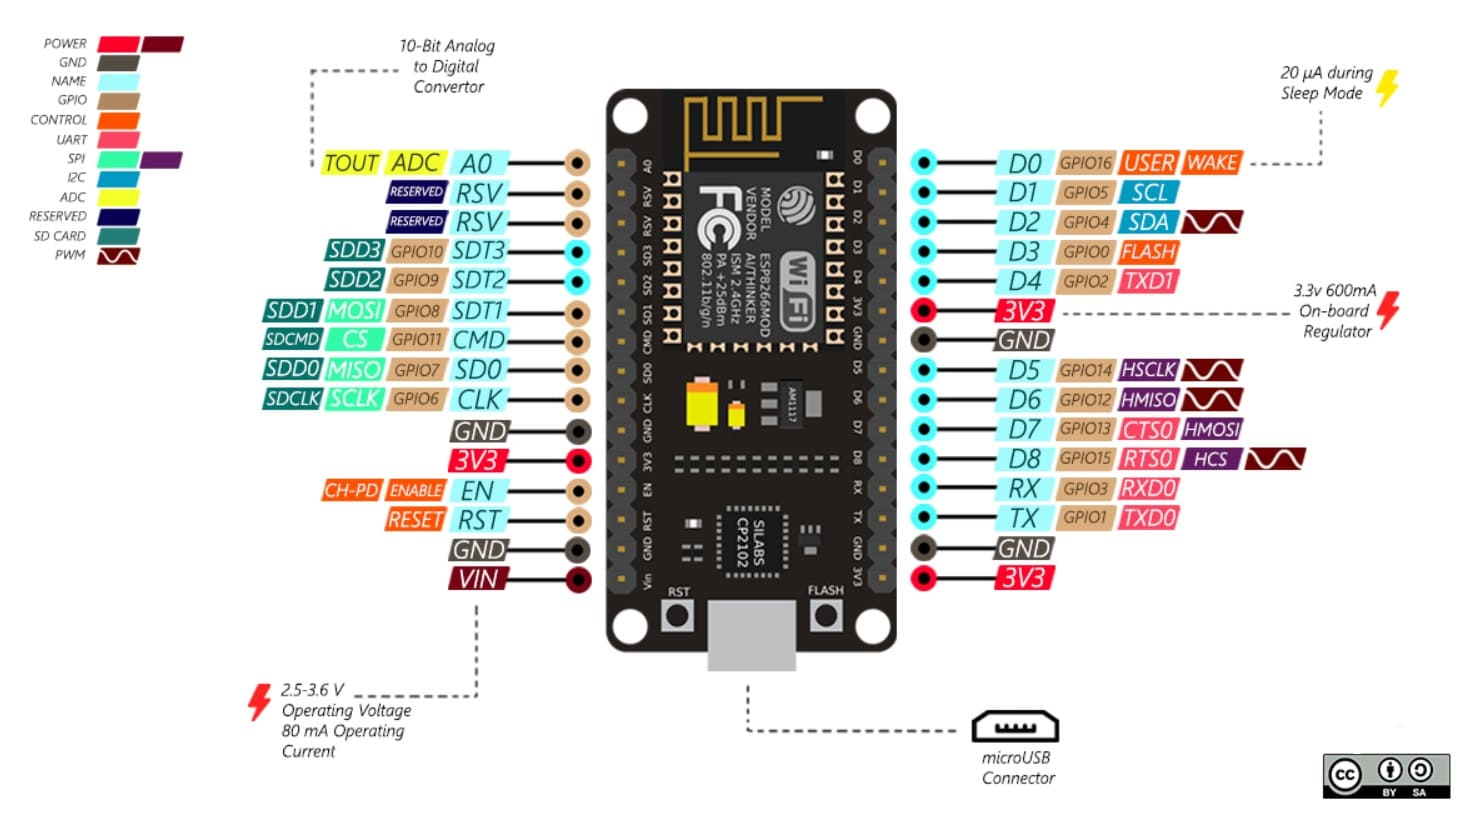




### Entrada Salida 

ESP8266 tiene 17 pines I/O (GPIO, General Purpose Input/Output pins). Estos pueden actuar de salida proporcionando tensión de 0V o 3.3V (LOW y HIGH). Actuando como entrada pueden reconocer una tensión de 0V o 3.3V suministrada al GPIO.


| Pin	| GPIO	 | Input	         | Output        |	Comentarios               |
| ---   | ---    |  ---              |  ---          |---                         |
| D0	| GPIO16 |	No interrupciones|	No PWM No I2C| HIGH durante boot          |
|       |        |                   |               | Resistencia Pull-Down      |
|       |        |                   |               | Conectar a RST para Wake-Up|
| D1    | GPIO5  |	OK	             | OK	         | SCL (I2C)                  |
| D2	| GPIO4	 |  OK	             | OK	         | SDA (I2c)                  |
| D3	| GPIO0	 | Pulled Up         | OK	         | Boot falla si pulled LOW   |
|       |        |                   |               | Conectado a botón FLASH    |
| D4    | GPIO2  | Pulled Up	     |OK	         | HIGH durante boot          |
|       |        |                   |               | Boot falla si pulled LOW   |
|       |        |                   |               | Built-in LED               |
|       |        |                   |               | TX1                        |


| Pin	| GPIO	 | Input	         | Output        |	Comentarios               |
| ---   | ---    |  ---              |  ---          |---                         |
| D5    | GPIO14 |	OK               | OK            | SLCK (SPI)                 |
| D6	| GPIO12 |	OK	             | OK	         | MISO (SPI)                 |
| D7	| GPIO13 |	OK	             | OK	         | MOSI (SPI)                 |
| D8	| GPIO15 |	Pulled to GND	 | OK            |	CS (SPI)                  |
|       |        |                   |               | LOW durante boot           |
|       |        |                   |               | Boot falla si pulled HIGH  |
|       |        |                   |               | No tiene Pull-Up           |
| RX    | GPIO3  |	OK	             | RX	         | HIGH durante boot          |
|       |        |                   |               | No usable si se usa UART   |
| TX	| GPIO1	 |TX	             | OK	         | HIGH durante boot          |
|       |        |                   |               | Boot falla si pulled LOW   |
|       |        |                   |               | Debug output en boot       |
|       |        |                   |               | No usable si se usa UART   |
|  A0	| ADC0	 |  Analog Input	 | NO	         |                            |



In [ ]:
En el entorno Arduino se usa el numero de la GPIO por ejemplo

**GPIO12 => 12**

### Pines PWM

| Nombre | GPIO  |
|  ---   |  ---  |
|  D2    | GPIO4 |
|  D5    | GPIO14|
|  D6    | GPIO12|
|  D8    | GPIO15|


Se utiliza la función analogWrite().

| Nombre           | sintaxis                   |  Descripcion                  |
|---               |---                         |---                            |
| analogWrite      |vf= analogWrite(pin,valor); | Genera un valor del tipo pwm  |
|                  |                            |pin: se utiliza para GPIO4 ->4 |
|                  |                            |valor:numero de 0 a 255        |
|                  |                            |vf=5/255*valor                 |



## Comunicación

El NodeMCU soporta:
1. UART
2. I2C 
3. SPI

### UART

UART, o Receptor/Transmisor Asíncrono Universal, es una comunicación en serie asíncronica. Con arquitectura punto a punto. En el NodeMCU, la UART se hace a través de los pines Rx y Tx, que se utilizan respectivamente para recibir y transmitir.

| Nombre | Puerto |
| ---    |   ---  |
|  RX    |  GPIO3 |
|  TX    |  GPIO1 |

### I2C

Esta red es del tipo sincrona y tiene una arquitectura maestro/esclavo que permite conectar varios y distintos sensores.

| Nombre | Puerto |Funcion |
| ---    |   ---  | ---    |
|  D1    |  GPIO5 | SCL    |
|  D2    |  GPIO4 | SDA    |


### SPI
Interfaz periférica en serie. Full-dúplex, Sincronica arquitectura maestro esclavo

| Nombre | Puerto  |Funcion |
| ---    |   ---   | ---    |
|  D5    |  GPIO14 | CLK    |
|  D6    |  GPIO12 | MISO   |
|  D7    |  GPIO13 | MOSI   |


### Libreria Esp8266Wifi

La librería WiFi para ESP8266 ha sido desarrollada basándose en el SDK de ESP8266, usando nombres convencionales y la filosofía de funcionalidades generales de la librería WiFi de Arduino. 

|Nombre  |   Sintaxis                  |            Funcion                                        |
|---     |---                          |---                                                        |
|begin   |WiFi.begin(ssid,contraseña); |Constructor del objeto  WIFI                               |
|        |                             |ssid: nombre de la red WIFI                                |
|        |                             |contraseña: contraseña de la red                           |
|status  |WiFi.status()                | Presenta el estado de la conexion                         |
|        |                             |  WL_CONNECTED: indica que esta conectado                  |
|localIP |WiFi.localIP()               | Presenta la direccion de red donde se conecto             |


### Codigo de prueba ESP8266WiFi

Se presenta el codigo de un programa que permite conectar un ESP8266 a una red. Se utiliza las funciones descrriptas en la seccion anterior. 



<span style="color:blue"> 
    
#include <ESP8266WiFi.h>  
void setup()  
{  
  Serial.begin(115200);  
  Serial.println();  
  WiFi.begin("nombre-red", "contraseña-red");  
  Serial.print("Conectando");  
  while (WiFi.status() != WL_CONNECTED)  
  {  
    delay(500);  
    Serial.print(".");  
  }  
  Serial.println();  
  Serial.print("Conectado, dirección IP: ");  
  Serial.println(WiFi.localIP());  
}  

void loop() {}
</span>

 ## Librería ESP8266WebServer
 
Un servidor web es una computadora que almacena los archivos que componen un sitio web (ej.  documentos HTML , imágenes, hojas de estilos CSS y archivo JavaScript) y los entrega a otro dispositivo que le solicita un servicio. Se desarrollo para el ESP8266 una libreria que permite implementar un servidor web. SE denomina libreria esp8266WebServer. Los metodos que se utilizan se muestran a continuacion



| Metodo          | Sintaxis                   |  Funcion      |
|---              |---                         |---            |
|ESP8266WebServer |ESP8266WebServer server(80) | Crea el objeto server |
|begin            | server.begin()             | Inicializa el servidor|
|close            | server.close()             | Apaga el servidor     |
|stop             | server.stop()              | Apaga el servidor     |
| on              | server.on("/", FuncionM);  |  indicamos una función que emitira una respuesta del servidor cuando|
|                 |                            |un navegador solicita la URL         |
|addHandler       | server. addHandler();      |              |
| onNotFound      | server.onNotFound();       |              |


| Metodo          | Sintaxis                   |  Funcion      |
|---              |---                         |---            |
| onFileUpload    | server.onFileUpload();     |              |
| send            | server.send(code,tipo_contenido,contenido)| Envia las respuestas solicitadas|
|                 |                                           |code:200, 404 |
|                 |                                           |tipo_contenido:"text/plain","image/png"|
|                 |                                           |contenido:
|streamFile      |server.streamFile(file, GetContentType(path));| Permite cargar una pagina completa |
|                |                                              | file
|handleClient     |server.handleClient();      |  Maneja las conexiones entrantes|


### PROGMEM
Permite cargar informacion en la memoria flash. Desspues se puede pasar a la RAM cuando hace falta

Es una característica Arduino AVR que ha sido portada a ESP8266 para asegurar la compatibilidad con las librerías existentes en Arduino, así como para ahorrar RAM. La sintaxis seria:

const char MAIN_page[] PROGMEM = R"=====( pagina web )======"


### Librerias
#include <ESP8266WiFi.h>  
#include <WiFiClient.h>  
#include <ESP8266WebServer.h> 

### Texto en HTML    

const char MAIN_page[] PROGMEM = R"=====(  
<!DOCTYPE html>  
<html>  
<body>  
<center>  
<h1>Pagina WEB </h1><br>
Nodemcu<br>
<hr>
</center>

</body>
</html>
)=====";


### Declara las claves para acceder a la red

const char* ssid = "mi_casa";  
const char* password = "mariu2020";  



//Declarar un objeto de la clase ESP8266WebServer  
ESP8266WebServer server(80); //Server on port 80  

//===============================================================  
// Esta rutina se ejecutara cuando se carga el IP  
//===============================================================  

void handleRoot() {  
 Serial.println("Pagina original ");  
 String s = MAIN_page; //Read HTML contents  
 server.send(200, "text/html", s); //Send web page  
}  
//==============================================================  
//                  SETUP  
//==============================================================  
void setup(void){  
  Serial.begin(115200);  
  WiFi.begin(ssid, password);     //Conexion al router WiFi   
  Serial.println("");  
  
  // Espera la conexion  
  while (WiFi.status() != WL_CONNECTED) {  
    delay(500);  
    Serial.print(".");  
  }  
  //Presenta los datos de la conexion
  Serial.println("");  
  Serial.print("Conectado a ");  
  Serial.println(ssid);  
  Serial.print("Direccion IP : ");  
  Serial.println(WiFi.localIP());  //Direccion de IP asignada por la red  
  // Carga las rutinas que se utilizaran por el servidor WEB
  server.on("/", handleRoot);      //La primera rutina que se observa en la pagina  
  server.begin();                  //Start server  
  Serial.println("HTTP server started");  
}  
//==============================================================  
//                     LOOP  
//==============================================================  
void loop(void){  
  server.handleClient();          //Handle client requests  
}

# Programa Webserver
En este programa se guarda la pagina WEb en la RAM utilizando PROGMEM. Se inicia 

En este programa se 

<span style="color:blue"> 

#include <ESP8266WiFi.h>  
#include <WiFiClient.h>  
#include <ESP8266WebServer.h> 

//---------------------------------------------------------------
// Texto en HTML

const char MAIN_page[] PROGMEM = R"=====(  
<!DOCTYPE html>  
<html>  
<body>  
<center>  
<h1>Programa para prender/apagar un LED </h1><br>
Apretar para <a href="ledOn">Prender LED</a><br>
Apretar para <a href="ledOff">Apagar LED</a><br>
<hr>
</center>

</body>
</html>
)=====";
   
#define LED 2  

//SSID y Password router WiFi  

const char* ssid = "red";  
const char* password = "password";  

//Declarar un objeto de la clase ESP8266WebServer  
ESP8266WebServer server(80); //Server on port 80  

//===============================================================  
// Esta rutina se ejecutara cuando se carga el IP  
//===============================================================  
void handleRoot() {  
 Serial.println("Pagina original ");  
 String s = MAIN_page; //Read HTML contents  
 server.send(200, "text/html", s); //Send web page  
}  

void handleLEDon() {   
 Serial.println("LED prendido");  
 digitalWrite(LED,LOW); //LED is connected in reverse  
 server.send(200, "text/html", "El LED esta prendido");  
}  

void handleLEDoff() {   
 Serial.println("LED apagado");  
 digitalWrite(LED,HIGH); //LED off  
 server.send(200, "text/html", "El LED esta apagado");   
}  
//==============================================================  
//                  SETUP  
//==============================================================  
void setup(void){  
  Serial.begin(115200);  
  WiFi.begin(ssid, password);     //Conexion al router WiFi   
  Serial.println("");  

  //Configuro el pin LED como salida  
  pinMode(LED,OUTPUT);   
  //Apaga el LED  
  digitalWrite(LED,HIGH);  
  
  // Espera la conexion  
  while (WiFi.status() != WL_CONNECTED) {  
    delay(500);  
    Serial.print(".");  
  }  

  //Presenta los datos de la conexion
  Serial.println("");  
  Serial.print("Conectado a ");  
  Serial.println(ssid);  
  Serial.print("Direccion IP : ");  
  Serial.println(WiFi.localIP());  //Direccion de IP asignada por la red  
  // Carga las rutinas que se utilizaran por el servidor WEB
  server.on("/", handleRoot);      //La primera rutina que se observa en la pagina  
  server.on("/ledOn", handleLEDon); //Rutina llamada cuando se envia ref="ledOn"   
  server.on("/ledOff", handleLEDoff);  //Rutina llamada cuando se envia ref="ledOff"    

  server.begin();                  //Start server  
  Serial.println("HTTP server started");  
}  
//==============================================================  
//                     LOOP  
//==============================================================  
void loop(void){  
  server.handleClient();          //Handle client requests  
}
    </span>

# DS18B20

Es un sensor de temperaturas fabricado por la compañía Maxim Integrated. Que se comercializa tanto en un integrado TO-92 como en forma de sonda impermeable, lo que permite realizar mediciones de temperatura en líquidos y gases. Su salida es digital y responde a la especificacion de red 1Wire.

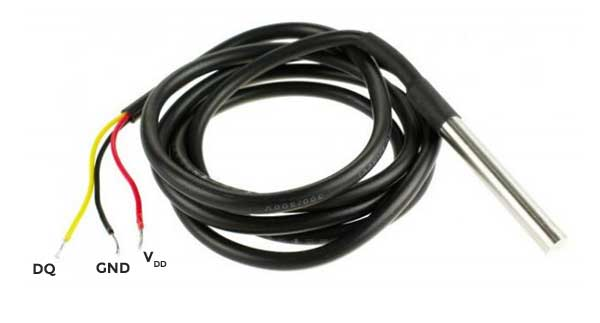
Imagen y conexion

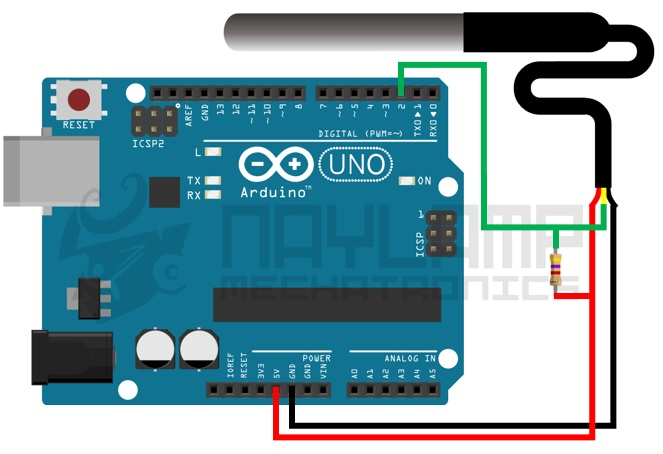

El valor de la resistencia es 4.7K

### Resolución del sensor de temperatura DS18B20

Se puede trabajar con diferentes resoluciones. 

|Resolución	|Temperatura|
| ---       |  ---      |
|9-bit      |	0,5ºC   |
|10-bit     |	0,25ºC  |
|11-bit	    |0,125ºC    |

# Programa DS18B20 un sensor en un hilo
<span style="color:blue"> 

#include <OneWire.h>  
#include <DallasTemperature.h>  
OneWire ourWire(2);                //Se establece el pin 2  como bus OneWire  
DallasTemperature sensors(&ourWire); //Se declara una variable u objeto para nuestro sensor  
void setup(void) {  
  Serial.begin(115200);  
  delay(100);  
  Serial.println("Hola");  
  sensors.begin();   //Se inicia el sensor  
}  

void loop(void) {  
  sensors.requestTemperatures();   //Se envía el comando para leer la temperatura  
float temp= sensors.getTempCByIndex(0); //Se obtiene la temperatura en ºC  

Serial.print("Temperatura= ");  
Serial.print(temp);  
Serial.println(" C");  
delay(100);         
}  
</span>

# Programa DS18B20 Dos sensores en un hilo detectar sensores
<span style="color:blue"> 

#include <OneWire.h>  

OneWire ourWire(2);                //Se establece el pin 2  como bus OneWire  

void setup(void) {  
  Serial.begin(9600);  
}  

void loop(void) {  
  byte addr[8];    
  Serial.println("Obteniendo direcciones:");  
  while (ourWire.search(addr))   
  {    
  Serial.print("Address = ");  
  for( int i = 0; i < 8; i++) {  
    Serial.print(" 0x");  
    Serial.print(addr[i], HEX);  
  }  
  Serial.println();  
}  

Serial.println();  
ourWire.reset_search();  
delay(2000);  
}  

# Programa DS18B20 Dos sensores en un hilo 


<span style="color:blue"> 

#include <OneWire.h>                
#include <DallasTemperature.h>
 
OneWire ourWire(0);                //Se establece el pin 0  como bus OneWire  
 
DallasTemperature sensors(&ourWire); //Se declara una variable u objeto para nuestro sensor  

DeviceAddress address1 = {0x28,  0x6D, 0xA9, 0x72, 0x3A, 0x19, 0x1, 0x4C };//dirección del sensor 1  
DeviceAddress address2 = {0x28,  0x6D, 0xA9, 0x72, 0x3A, 0x19, 0x1, 0x4C };//dirección del sensor 1  

void setup() {  
delay(1000);  
Serial.begin(115200);  
sensors.begin();   //Se inicia el sensor  
}
 
void loop() {  
  
sensors.requestTemperatures();   //envía el comando para obtener las temperaturas  
float temp1= sensors.getTempC(address1);//Se obtiene la temperatura en °C del sensor 1  
float temp2= sensors.getTempC(address2);//Se obtiene la temperatura en °C del sensor 2  

Serial.print("Temperatura 1 = ");  
Serial.print(temp1);  
Serial.print(" C");  
Serial.print("   Temperatura 2 = ");  
Serial.print(temp2);  
Serial.println(" C");  
delay(1000);    
                    
}  


## Servidor NPT

El Protocolo de Tiempo por Red o Network Time Protocol (NTP) es un protocolo de Internet utilizado para sincronizar los relojes internos de sistemas informáticos (tales como computadoras personales o servidores corporativos). La sincronización esporádica del reloj interno de las computadoras (por ejemplo, dos veces por semana) evita desfasajes en el tiempo local de las mismas. Dichos desfasajes de tiempo pueden ocasionar serios inconvenientes durante el intercambio de datos con otros sistemas.

Se puede incluir este servicio utilizando la libreria  **NTPClient.h**

Para incluir la librería precedemos de la siguiente manera:

-   En el IDE  Arduino, ve a  > Libreria > Administrar bibliotecas.
-  Se abre el  Gestor de Bibliotecas.
-  Buscamos  NTPClient  y aparece una de Fabrice Weinber como se muestra en la imagen
-  Damos al botón Instalar

Se crea un objeto ntpUDP de la clase  WiFiUDP
<div align="center"> WiFiUDP ntpUDP; </div>

Se crea un objeto tiempo de la clase NTPClient: el cual es el encargado de suministrar la hora.
<div align="center">NTPClient tiempo(ntpUDP, "pool.ntp.org", utcOffsetInSeconds);</div>
Se inicializa el objeto tiempo en la funcion  *setup()*
<div align="center">tiempo.begin() </div>

|nombre    |sintaxis                                                      |Funcion                                    |
|---       |---                                                           |---                                        |
|NTPClient |NTPClient tiempo(ntpUDP, "pool.ntp.org", utcOffsetInSeconds); |crea un objeto tiempo de la clase NTPClient|
|begin     |tiempo.begin()                                                | Inicializa el objeto tiempo               |
|update    |tiempo.update()                                               | mira la hora en Internet                  |
|getDay    |dia_sem[tiempo.getDay()]                                      | Muestra el dia de la semana               |
|getHour   |tiempo.getHour()                                              | Presenta la hora                          |
|getMinutes|tiempo.getMinutes()                                           | Presenta los minutos                      |
|getSecond |tiempo.getSecond ()                                           | Presenta los segundos                     |
|getFormattedTime|tiempo.getFormattedTime()                               | Presenta todos los datos                  |

A continuacion se presenta el codigo de un programa de ejemplo

<span style="color:blue"> 
#include <NTPClient.h>  
#include <ESP8266WiFi.h>  
#include <WiFiUdp.h>  

const char *ssid     = "red";  
const char *password = "password";  

const long utcOffsetInSeconds = 10800;  

char daysOfTheWeek[7][12] = {"Domingo", "Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado"};  

// Define NTP Client to get time  
WiFiUDP ntpUDP;  
NTPClient timeClient(ntpUDP, "pool.ntp.org", utcOffsetInSeconds);  

void setup(){  
  Serial.begin(115200);  

  WiFi.begin(ssid, password);  

  while ( WiFi.status() != WL_CONNECTED ) {  
    delay ( 500 );  
    Serial.print ( "." );  
  }  

   timeClient.begin();  
}

void loop() {  
  timeClient.update();  

  Serial.print(daysOfTheWeek[timeClient.getDay()]);  
  Serial.print(", ");  
  Serial.print(timeClient.getHours());  
  Serial.print(":");  
  Serial.print(timeClient.getMinutes());  
  Serial.print(":");  
  Serial.println(timeClient.getSeconds());  
  //Serial.println(timeClient.getFormattedTime());  

  delay(1000);  
}
</span>.

## WEB SERVER mide temp, led y Servidor NPT
Se presenta el codigo de un programa que mide temperatura, prede/apaga un led y tiene la hora.  

<span style="color:blue"> 

#include <ESP8266WiFi.h>  
#include <WiFiClient.h>  
#include <OneWire.h>  
#include <DallasTemperature.h>  
#include <ESP8266WebServer.h>  
#include <NTPClient.h>  
#include <WiFiUdp.h>  

OneWire ourWire(0);                //Se establece el pin 0  como bus OneWire  
DallasTemperature sensors(&ourWire); //Se declara una variable u objeto para nuestro sensor  
DeviceAddress address1 = {0x28,  0x6D, 0xA9, 0x72, 0x3A, 0x19, 0x1, 0x4C };//dirección del sensor 1  
DeviceAddress address2 = {0x28,  0x6D, 0xA9, 0x72, 0x3A, 0x19, 0x1, 0x4C };//dirección del sensor 1  

//---------------------------------------------------------------  
//Our HTML webpage contents in program memory  
const char MAIN_page[] PROGMEM = R"=====(  
<!DOCTYPE html>  
<html>  
<body>  
<center>  
<h1>Programa para prender/apagar un LED </h1><br>  
Apretar para <a href="ledOn">Prender LED</a><br>  
Apretar para <a href="ledOff">Apagar LED</a><br>  
Apretar para <a href="tempe">Leer temperatura</a><br>  

<hr>  
</center>  

</body>  
</html>  
)=====";  
//---------------------------------------------------------------  
//On board LED Connected to GPIO2  
#define LED 2    

//SSID and Password of your WiFi router  
const char* ssid = "red";  
const char* password = "password";  

//Declare a global object variable from the ESP8266WebServer class.  
ESP8266WebServer server(80); //Server on port 80  

const long utcOffsetInSeconds = -10800;  

char daysOfTheWeek[7][12] = {"Domingo", "Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado"};  


WiFiUDP ntpUDP;  
NTPClient timeClient(ntpUDP, "pool.ntp.org", utcOffsetInSeconds);  

//===============================================================  
// This routine is executed when you open its IP in browser  
//===============================================================  
void handleRoot() {  
 Serial.println("Pagina original ");  
 String s = MAIN_page; //Read HTML contents  
 server.send(200, "text/html", s); //Send web page  
}  

void handleLEDon() {   
 Serial.println("LED prendido");  
 digitalWrite(LED,LOW); //LED is connected in reverse  
 server.send(200, "text/html", "El LED esta prendido"); //Send ADC value only to client ajax request  
}  

void handleLEDoff() {  
 Serial.println("LED apagado");  
 digitalWrite(LED,HIGH); //LED off  
 server.send(200, "text/html", "El LED esta apagado"); //Send ADC value only to client ajax request  
}  

void handletempe() {   
 char texto[200];  
 String shora;  
 char hora[100];  
 Serial.println("Leer temperaturas ");  
 timeClient.update();  

  Serial.print(daysOfTheWeek[timeClient.getDay()]);  
  Serial.print(", ");  
  Serial.print(timeClient.getHours());  
  Serial.print(":");  
  Serial.print(timeClient.getMinutes());  
  Serial.print(":");  
  Serial.println(timeClient.getSeconds());  
  Serial.println(timeClient.getFormattedTime());  
  shora=timeClient.getFormattedTime();  
  shora.toCharArray(hora,100);  
sensors.requestTemperatures();   //envía el comando para obtener las temperaturas  
float temp1= sensors.getTempC(address1);//Se obtiene la temperatura en °C del sensor 1  
float temp2= sensors.getTempC(address2);//Se obtiene la temperatura en °C del sensor 1  
 sprintf(texto,"Hora=%s Temp 1=%f Temp 2= %f <br>",hora, temp1, temp2);  
 server.send(200, "text/html", texto); //Send ADC value only to client ajax request  
 Serial.println(temp1);  
 }  

//==============================================================  
//                  SETUP  
//==============================================================  
void setup(void){  
  Serial.begin(115200);  
  WiFi.begin(ssid, password);     //Connect to your WiFi router  
  Serial.println("");  
  sensors.begin();   //Se inicia el sensor  
  //Onboard LED port Direction output  
  pinMode(LED,OUTPUT);   
  //Power on LED state off  
  digitalWrite(LED,HIGH);  
  
  // Wait for connection  
  while (WiFi.status() != WL_CONNECTED) {  
    delay(500);  
    Serial.print(".");  
  }  

  //If connection successful show IP address in serial monitor  
  Serial.println("");  
  Serial.print("Connected to ");  
  Serial.println(ssid);  
  Serial.print("IP address: ");  
  Serial.println(WiFi.localIP());  //IP address assigned to your ESP  

  server.on("/", handleRoot);        
  server.on("/ledOn", handleLEDon); 
  server.on("/ledOff", handleLEDoff);   
  server.on("/tempe", handletempe);  

  server.begin();                  //Start server  
  Serial.println("HTTP server started");  
  timeClient.begin();  
}  

//==============================================================  
//                     LOOP  
//==============================================================  

   void loop(void){  
  server.handleClient();          //Handle client requests  

    }
    </span>


## Sistema de ficheros
### Esquema de la memoria flash

El sistema de archivos está almacenado en la memoria flash al igual que el sketch, la programación de un nuevo programa no modificará el contenido del sistema de archivos. Esto permite utilizar el sistema de archivos para almacenar datos del sketch, archivos de configuración o contenido para el servidor web.

El tamaño del sistema de ficheros depende del tamaño del chip flash. Dependiendo de que tarjeta se ha seleccionado en el IDE, tendrás las siguientes opciones de tamaño flash:  

|Tarjeta        |	tamaño chip flash[ bytes] |Tamaño sistem. fich [bytes]|
|---            |---                          |---                        |
|Modulo generico| 	512k                      |64k, 128k                  |
|Modulo generico| 	1M 	                      |64k, 128k, 256k, 512k      |
|Modulo generico| 	2M                        |	1M                        |
|Modulo generico|	4M 	                      |1M, 2M, 3M                 |
|Adafruit HUZZAH|	4M 	                      |1M, 2M, 3M                 |
|ESPresso Lite 1.0| 	4M |	1M, 2M, 3M|
|ESPresso Lite 2.0| 	4M |	1M, 2M, 3M|
|NodeMCU 0.9| 	4M| 	1M, 2M, 3M|
|NodeMCU 1.0| 	4M| 	1M, 2M, 3M|
|Olimex MOD-WIFI-ESP8266(-DEV)| 	2M |	1M|
|SparkFun Thing| 	512k |	64k|
|SweetPea ESP-210| 	4M |	1M, 2M, 3M |
|WeMos D1 & D1 mini| 	4M |	1M, 2M, 3M |
|ESPDuino| 	4M |	1M, 2M, 3M |
|WiFiduino| 	4M |	1M, 2M, 3M|




#include "FS.h"

Limitaciones del sistema de ficheros SPIFFS

- No soporta directorios,
- Limitación a 32 caracteres en total en los nombres de ficheros.


    Descarga la herramienta: https://github.com/esp8266/arduino-esp8266fs-plugin/releases/download/0.3.0/ESP8266FS-0.3.0.zip.
    En el directorio de sketchs de Arduino, crea el directorio tools si no existe todavía.
    Descomprime la herramienta en el directorio tools (la ruta debe quedar <home_dir>/Arduino/tools/ESP8266FS/tool/esp8266fs.jar).
    Reinicia el IDE de Arduino.
    Abre el sketch (o crea uno nuevo y sálvalo)
    Ve al directorio del sketch (selecciona Programa > Mostrar carpeta de programa)
    Crea un directorio llamado data y algún fichero que quieras tener en el sistema de ficheros.
    Asegúrate de tener tu tarjeta seleccionada, el puerto (COM, tty, etc) y cierra el Monitor Serie.
    Selecciona Herramientas > ESP8266 Sketch Data Upload. Debería comenzar la subida de los ficheros a sistema de ficheros flash del ESP8266. Cuando acabe, la barra de estado del IDE mostrará el mensaje SPIFFS Image Uploaded.

Objeto sistema de ficheros SPIFFS
| Nombre |  sintaxis      |    Funcion  |  
|---     |---             |---          |
|begin   | SPIFFS.begin() |Este método monta el sistema de ficheros SPIFFS|
|end     | SPIFFS.end()   |Este método desmonta el sistema de ficheros SPIFFS|
|format  | SPIFFS.format()|Formatea el sistema de ficheros. |
|open    |SPIFFS.open(path, mode)|Abre un fichero. path debe ser un camino absoluto comenzando con un slash (p.ej|
|        |                 |mode es una palabra que especifica el modo de acceso.|
|        |                 | DEvuelve un objeto File                          |
|exists  |SPIFFS.exists(path)|Devuelve true si existe el archivo con la ruta indicada, false en caso contrario.|
|openDir |SPIFFS.openDir(path)|Abre un directorio en la ruta absoluta indicada. Devuelve un objeto Dir.|
|remove  |SPIFFS.remove(path)|Elimina el fichero de la ruta absoluta indicada. |
|        |                   |Devuelve true si el fichero se borró satisfactoriamente.|
|rename  |SPIFFS.rename(pathFrom, pathTo)|Renombra el fichero pathFrom a pathTo. La ruta debe ser absoluta.|
|        |                               |Devuelve true si el fichero se renombra satisfactoriamente.|
|info    |SPIFFS.info(fs_info);|Rellena la estructura FSInfo con información sobre el sistema de ficheros.|
|        |                      | Devuelve true si tiene éxito, false en caso contrario.|


### Modos de acceder a los archivos usando open

En la tabla se muestra la forma de acceder a 

|Modo| Funcion                                                                                 |
|--- |---                                                                                      |
|r   | Abre un fichero de texto para leerlo. La secuencia se coloca en el comienzo del archivo.|
|r+  | Abre un fichero para lectura y escritura. La secuencia se coloca en el comienzo del archivo.|
|w   | Trunca en fichero con una longitud cero o crea un fichero de texto para escritura.|
|w+  | Abre para lectura y escritura. El fichero se crea si no existe, de lo contrario se trunca.|
|a   | Abre el fichero para añadir (escribiendo al final del fichero). El fichero se crea si no existe.|
|a+  | Abre el fichero para añadir (escribiendo al final del fichero). El fichero se crea si no existe.|
      

### Ejemplo de uso de la funcion Open
Devuelve el objeto File. Para comprobar si el archivo se abrió con éxito, utilice un operador booleano.

<span style="color:blue">   

File f = SPIFFS.open("/f.txt", "w");  
if (!f) {  
    Serial.println("No se pudo abrir el fichero");  
}  
</span>

### Estructura de información del sistema de archivos

struct FSInfo {
    size_t totalBytes;
    size_t usedBytes;
    size_t blockSize;
    size_t pageSize;
    size_t maxOpenFiles;
    size_t maxPathLength;
};
Esta es la estructura que se rellena al usar el método FS::info .

   - totalBytes — Tamaño total de datos útiles en el sistema de archivos.
   - usedBytes — Número de bytes usado por los ficheros.
   - blockSize — Tamaño del bloque SPIFFS.
   - pageSize — Tamaño de la página lógica SPIFFS.
   - maxOpenFiles — Número máximo de archivos que pueden estar abiertos simultáneamente.
   - maxPathLength — Longitud máxima del nombre de archivo (incluido un byte cero de terminación).


### Objeto directorio Dir

El propósito del objeto Dir es iterar sobre los ficheros dentro del directorio. Provee los métodos: next(), fileName(), y openFile(mode).

El siguiente ejemplo muestra como debe utilizarse:

<span style="color:blue"> 
    
Dir dir = SPIFFS.openDir("/data");  
while (dir.next()) {  
    Serial.print(dir.fileName());  
    File f = dir.openFile("r");  
    Serial.println(f.size());  
    if(dir.fileSize()) {  
        File f = dir.openFile("r");  
        Serial.println(f.size());  
    }  
}  

</span>

### Metodos utilizado en el objeto dir

|Metodo  | Sintaxis  |     Funcion                                                            |
|---     |---        |---                                                                     |
|next    |dir.next() |Devuelve true mientras haya ficheros en el directorio para iterar. |
|        |           |Debe llamarse antes de llamar a las funciones fileName(),|
|        |           |fileSize() y openFile()
|fileName|dir.fileName()|Devuelve el nombre del archivo actual apuntado por el iterador interno.|
|fileSize|dir.fileSize()|Devuelve el tamaño del archivo actual apuntado por el iterador interno.|
|openFile|dir.openFile("r"); |Este método toma el argumento mode que tiene el mismo significado |
|        |                   |que para la función SPIFFS.open() |

### Objeto fichero File

Las funciones SPIFFS.open() y dir.openFile() devuelven un objeto File. Este objeto soporta todas las funciones de Stream, para que puedas usar readBytes, findUntil, parseInt, println y todos los otros métodos Stream.


Metodos usados en File
| Metodo  | Sintaxis              | Funcion                                                  |
|---      |---                    |---                                                       |
|seek     |file.seek(offset, mode)|Salta a una cierta posición de un fichero. Dependiendo de 
|         |                       |un valor de mode, se mueve a la posición actual           |
|         |                       |Devuelve true si la posición se estableció satisfactoriamente.|
|position |file.position()        |Devuelve la posición actual dentro del fichero, en bytes.|
|size     |file.size()            |Devuelve el tamaño del fichero, en bytes.|
|name     |String name = file.name();|Devuelve el nombre del fichero, como const char*.|
|         |                       |Conviértelo a String para almacenarlo|
|close    |file.close()           |Cierra el fichero. |


#### Modo para seek
   | Modo  | Funcion                                                               |
   |---    |---                                                                    |
   |SeekSet| la posición se establece a offset bytes desde el comienzo del fichero.|
   |SeekCur| la posición actual se mueve a offset bytes.|
   |SeekEnd| la posición se establece a offset bytes desde el final del fichero.|


In [ ]:
digitalRead    lee un puerto digital
digitalWrite   escribe un puerto digital
analogRead     lee un puerto analogico 
analogWrite    escribe un puerto analogico  PWM

Amplificador PWM 

         PArlante 8 ohm
                  4 ohm
        
        Vcc=12V
        Pd=12*12/4=40W
        
        Prms=